In [90]:
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt 
import ace_tools_open as tools; 
import requests
import spacy
from bs4 import BeautifulSoup
from spacy.tokens import Doc
from spacy.lang.pt.examples import sentences 
from string import punctuation
from collections import Counter
import numpy as np
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud


In [4]:
nlp = spacy.load('pt_core_news_sm') # commented out once it's loaded

punctuations = list(punctuation)

In [35]:
# Newspapers to search

newsp = ['cmjornal.pt/', 
         'dn.pt/',
         'expresso.pt/',
         'folhanacional.pt/',
         'jn.pt/',
         'ionline.sapo.pt/',   
         'sol.sapo.pt/',
         'observador.pt/',
         'publico.pt/',
         'sabado.pt/',
         'sapo.pt/',
         'visao.pt/',
         ]

not_keywords = ["/multimedia", "/videos", 
                "/famosos", "/celebridades", 
                "/tecnologia", "/boa-vida", 
                "/tendencias", "/desporto",
                "/maissobre", "/ciencia",
                "/cinema", "/cultura",
                "/cidades", "/dinheiro",
                "/blogues", "/podcasts",
                "/vida", "/artes",
                "/iniciativas", "/colunistas/andre",
                "/tribuna"]

stop_words = {'comprida', 'lá', 'mesmo', 'ela', 'de', 'quero', 'vão', 'nesta', 'em', 'com',
              'tais', 'neste', 'obrigado', 'bom', 'for', 'vai', 'fazer', 'tens', 'alguns', 'todos',
              'tu', 'muito', 'estás', 'deve', 'novas', 'todo', 'foste', 'pode', 'pontos', 'pegar',
              'quieto', 'seria', 'eles', 'coisa', 'faz', 'sou', 'daquela', 'tua', 'suas', 'teu',
              'cuja', 'esses', 'vindo', 'aquele', 'um', 'certamente', 'essa', 'no', 'vens', 'também',
              'maiorias', 'fostes', 'tanta', 'elas', 'desse', 'diante', 'pelas', 'nove', 'quinta', 'maior',
              'do', 'quando', 'aqueles', 'desta', 'sabe', 'ambas', 'que', 'tentar', 'estes', 'próximo',
              'povo', 'sem', 'uns', 'tão', 'além', 'geral', 'porquanto', 'fora', 'vêm', 'tivemos',
              'depois', 'ir', 'ora', 'tarde', 'nessa', 'da', 'nós', 'ver', 'tiveram', 'tem',
              'cada', 'exemplo', 'número', 'meus', 'tuas', 'conhecido', 'cento', 'devem', 'para', 'fomos',
              'à', 'favor', 'quanto', 'teve', 'apenas', 'este', 'vais', 'mas', 'querem', 'lugar',
              'vinte', 'quê', 'após', 'apoio', 'mal', 'quarta', 'grande', 'adeus', 'pelos', 'parece',
              'dezanove', 'ligado', 'sob', 'estou', 'ao', 'final', 'talvez', 'demais', 'aos', 'agora',
              'você', 'nem', 'maioria', 'vez', 'treze', 'menor', 'temos', 'possível', 'ambos', 'não',
              'isto', 'dezoito', 'tempo', 'estas', 'área', 'nenhuma', 'fui', 'estará', 'cujo', 'faço',
              'bem', 'logo', 'quais', 'onde', 'menos', 'aquela', 'quatro', 'outras', 'pouca', 'dar',
              'dezasseis', 'último', 'valor', 'é', 'antes', 'aqui', 'mais', 'sétimo', 'dizem', 'estão',
              'veja', 'dezassete', 'ele', 'tivestes', 'tive', 'quarto', 'nova', 'bastante', 'pois', 'apoia',
              'outra', 'teus', 'caminho', 'fazeis', 'lado', 'somente', 'esteve', 'fazemos', 'nesse', 'dessa',
              'numa', 'qualquer', 'momento', 'assim', 'esse', 'boa', 'pôde', 'duas', 'longe', 'meio',
              'saber', 'és', 'ponto', 'daquele', 'estava', 'irá', 'perto', 'num', 'aí', 'umas',
              'nossas', 'falta', 'o', 'dão', 'quer', 'custa', 'tipo', 'sexto', 'vinda', 'segundo',
              'sétima', 'ter', 'seu', 'poder', 'enquanto', 'algo', 'sois', 'se', 'poderá', 'grandes',
              'naquele', 'dá', 'novos', 'tanto', 'cedo', 'vossas', 'cima', 'posição', 'era', 'na',
              'ser', 'vossos', 'seis', 'terceira', 'fim', 'onze', 'disso', 'tentei', 'iniciar', 'minha',
              'apontar', 'estiveram', 'quem', 'fará', 'até', 'sexta', 'zero', 'pouco', 'então', 'sei',
              'vossa', 'ainda', 'nuns', 'parte', 'sua', 'a', 'mês', 'acerca', 'terceiro', 'primeiro',
              'estar', 'oitava', 'grupo', 'porquê', 'contra', 'me', 'forma', 'dizer', 'sete', 'toda',
              'dois', 'portanto', 'estado', 'podia', 'vos', 'máximo', 'vocês', 'comprido', 'tenho', 'baixo',
              'somos', 'através', 'são', 'quinto', 'nada', 'segunda', 'outros', 'sempre', 'vosso', 'certeza',
              'debaixo', 'oitavo', 'lhe', 'dos', 'mil', 'têm', 'desde', 'nível', 'nos', 'usar',
              'primeira', 'fazes', 'fazia', 'tiveste', 'deste', 'corrente', 'oito', 'vós', 'doze', 'das',
              'sistema', 'inclusive', 'já', 'vem', 'contudo', 'minhas', 'cinco', 'estivestes', 'naquela', 'nas',
              'vários', 'tal', 'fazem', 'tentaram', 'posso', 'estiveste', 'direita', 'isso', 'embora', 'pela',
              'uma', 'breve', 'nossa', 'números', 'nossos', 'essas', 'dentro', 'deverá', 'partir', 'próxima',
              'eventual', 'conselho', 'às', 'esta', 'foi', 'só', 'te', 'possivelmente', 'obrigada', 'relação',
              'meses', 'três', 'põem', 'quieta', 'fez', 'ali', 'aquilo', 'sobre', 'qual', 'atrás',
              'estive', 'está', 'sim', 'estivemos', 'todas', 'cá', 'ou', 'muitos', 'porque', 'foram',
              'algumas', 'pelo', 'por', 'tente', 'questão', 'nosso', 'local', 'novo', 'nunca', 'como',
              'meu', 'tudo', 'porém', 'as', 'vezes', 'usa', 'os', 'diz', 'e', 'dez',
              'ademais', 'seus', 'conhecida', 'ontem', 'quinze', 'põe', 'des', 'entre', 'eu', 'catorze',
              'próprio', 'tendes', 'aquelas', 'podem', 'inicio', 'puderam', 'de o', 'correio', ' ', 'manhã',
              'a o', 'comentário', 'conteúdo', 'espaço', 'leitor', '', '”','“', 'em o', 'em a', 'em os', 'em as', 'em',
              'em de', 'em da', 'em do', 'em dos', 'em para', 'em por', 'em com', 'em sem', 'em sobre', 'em sob', 'em acerca',
              'em um', 'em uma', 'em uns', 'em umas', 'em ao', 'em à', 'em aos', 'em às', 'em na', 'em no', 'em nas', 'em nos',
              ' ', '  ', '...'}

In [6]:
# Import df_for_visuals to dataframe df
df = pd.read_csv('3rd deliverable/df_for_visuals.csv')

# List the columns
print(df.columns)

# Display the shape of the dataframe    
print(df.shape)

# Display the first 5 rows
display(df.head())


Index(['url', 'timestamp', 'processed_url_text', 'newspaper', 'arquivo_url',
       'title', 'authors', 'publish_date', 'text', 'Unnamed: 0', 'Lemmas',
       'Lemma_String', 'year', 'filtered_text', 'Lemmas_filtered'],
      dtype='object')
(2945, 15)


,url,timestamp,processed_url_text,newspaper,arquivo_url,title,authors,publish_date,text,Unnamed: 0,Lemmas,Lemma_String,year,filtered_text,Lemmas_filtered
0,https://www.cmjornal.pt/politica/amp/andre-ven...,20200124190851,andre ventura do chega quer camaras nas fardas...,cmjornal.pt/,https://arquivo.pt/noFrame/replay/202001241908...,André Ventura do Chega quer câmaras nas fardas...,[],NaN,O partido Chega apresentou um projeto de resol...,NaN,"['partido', 'chega', 'apresentar', 'projeto', ...",partido chega apresentar projeto resolução def...,2020,O partido Chega apresentou um projeto de resol...,"['partido', 'chega', 'apresentar', 'projeto', ..."
1,https://www.cmjornal.pt/politica/amp/aprovada-...,20200203181044,aprovada proposta do chega para divulgar finan...,cmjornal.pt/,https://arquivo.pt/noFrame/replay/202002031810...,Aprovada proposta do Chega para divulgar finan...,[],NaN,A proposta do Chega para que seja pública a li...,NaN,"['proposta', 'chega', 'público', 'lista', 'fin...",proposta chega público lista financiamento ver...,2020,A proposta do Chega para que seja pública a li...,"['proposta', 'chega', 'público', 'lista', 'fin..."
2,https://www.cmjornal.pt/politica/amp/aprovado-...,20200206190139,aprovado voto do chega para condenar agressoes...,cmjornal.pt/,https://arquivo.pt/noFrame/replay/202002061901...,Aprovado voto do Chega para condenar agressões...,[],NaN,"Dos cinco votos apresentados hoje pelo Chega, ...",NaN,"['voto', 'apresentar', 'hoje', 'chega', 'aprov...",voto apresentar hoje chega aprovação plenário ...,2020,"Dos cinco votos apresentados hoje pelo Chega, ...","['voto', 'apresentar', 'hoje', 'chega', 'aprov..."
3,https://www.cmjornal.pt/politica/amp/comissao-...,20200227012044,comissao diz que projeto de castracao quimica ...,cmjornal.pt/,https://arquivo.pt/noFrame/replay/202002270120...,Comissão diz que projeto de castração química ...,[],NaN,A Comissão de Assuntos Constitucionais decidiu...,NaN,"['comissão', 'assuntos', 'constitucionais', 'd...",comissão assuntos constitucionais decidir segu...,2020,A Comissão de Assuntos Constitucionais decidiu...,"['comissão', 'assuntos', 'constitucionais', 'd..."
4,https://www.cmjornal.pt/politica/amp/lei-do-ch...,20200210190432,lei do chega da castracao quimica e inconstitu...,cmjornal.pt/,https://arquivo.pt/noFrame/replay/202002101904...,Lei do Chega da castração química é inconstitu...,[],NaN,Lei do Chega da castração química é inconstitu...,NaN,"['lei', 'chega', 'castração', 'químico', 'inco...",lei chega castração químico inconstitucional a...,2020,Lei do Chega da castração química é inconstitu...,"['lei', 'chega', 'castração', 'químico', 'inco..."


### Initial assessment of news articles length. 
A good way to start is to check the length of the news articles. This will give us an idea of the average length of the news articles and the distribution of the length of the news articles. This will help us to decide the minimum length of the news articles that we can use for training the model (smaller articles aren't likely to have relevant information; this was checked manually)

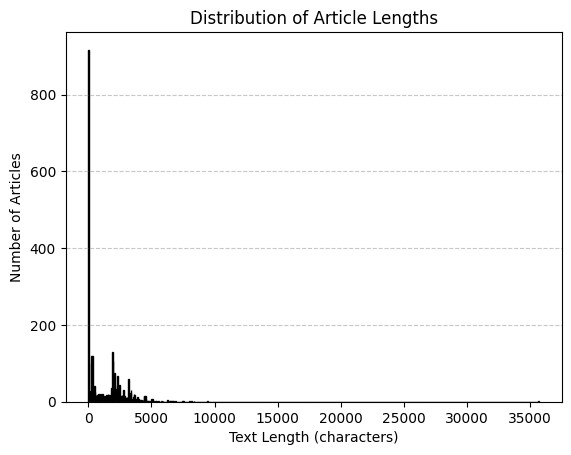

In [7]:
# Replace NaN or non-string entries in 'filtered_text' with an empty string
df['filtered_text'] = df['filtered_text'].fillna('').astype(str)

# Calculate the length of each article in 'filtered_text'
df['text_length'] = df['filtered_text'].apply(len)

# Define bins for text lengths
bins = range(0, df['text_length'].max() + 50, 50)

# Create a histogram
plt.hist(df['text_length'], bins=bins, edgecolor='black')

# Customize the plot
plt.title('Distribution of Article Lengths')
plt.xlabel('Text Length (characters)')
plt.ylabel('Number of Articles')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


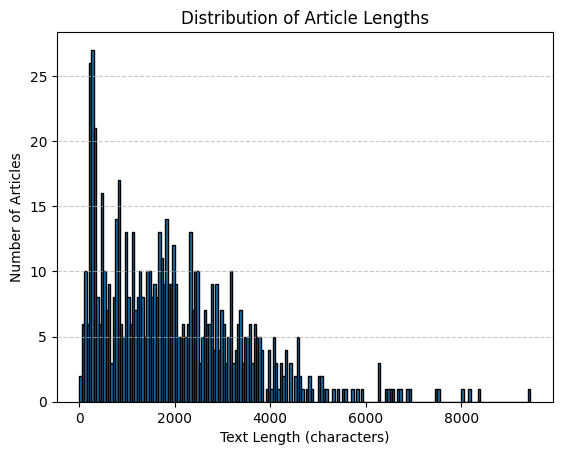

In [ ]:
# Replace NaN with an empty string
df['filtered_text'] = df['filtered_text'].fillna('').astype(str)

# Calculate the length of each article in 'filtered_text'
df['text_length'] = df['filtered_text'].apply(len)

# Define bins for text lengths
bins = range(0, df['text_length'].max() + 50, 50)

# Create a histogram
plt.hist(df['text_length'], bins=bins, edgecolor='black')

# Customize the plot
plt.title('Distribution of Article Lengths')
plt.xlabel('Text Length (characters)')
plt.ylabel('Number of Articles')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
df.columns
# Drop the columns authors, published_date, unnamed: 0, lemmas, Lemma_string, year, lemmas_filtered
df = df.drop(columns=['authors', 'publish_date', 'Unnamed: 0', 'Lemmas', 'Lemma_String', 'year', 'Lemmas_filtered'])

In [ ]:
lemmas_dict = {}

# Loop through each text along with its index
for index, row in df.iterrows():
    text = row['filtered_text']  # Access the 'text' column
    if text is None or not isinstance(text, str):
        print(f"Skipping index {index} because the text is None")
        continue
    doc = nlp(text)
    lemmas = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in doc ]
    lemmas = [ word for word in lemmas if word not in stop_words and word not in punctuations ]
    lemmas = [word for word in lemmas if word not in {"em o", "por o", "", "“", "”", "de este", "em este"}]  # Additional filter
    lemmas_dict[index] = lemmas  # Store lemmas in the dictionary with index as key

# Convert dictionary to a series and assign as a new column in the DataFrame
df['Lemmas_filtered'] = pd.Series(lemmas_dict)


In [ ]:
def extract_ngrams(texts, n=2):
    """
    Extract n-grams (bigrams or trigrams) from a list of texts.
    
    Parameters:
    texts (list): List of sentences or reviews to extract n-grams from.
    n (int): Number of words in each n-gram (e.g., 2 for bigrams, 3 for trigrams).
    
    Returns:
    Counter: Frequency count of n-grams.
    """
    ngrams = []
    for doc in nlp.pipe(texts):  # Process each text in the list with SpaCy
        tokens = [token.text for token in doc if not token.is_stop and not token.is_punct]
        # ngrams += zip(*[tokens[i:] for i in range(n)])  # Create n-grams

        # This way we ensure the n grams are all of the specified length
        ngrams += [ngram for ngram in zip(*[tokens[i:] for i in range(n)]) if len(ngram) == n] 
    
    return Counter(ngrams)

# Example usage with bigrams and trigrams

df['Lemma_String'] = df['Lemmas_filtered'].apply(lambda lemmas: " ".join(lemmas) if isinstance(lemmas, list) else "")

# Extract bigrams
bigram_counts = extract_ngrams(df['Lemma_String'], n=2)
print("Top 10 Bigrams:", bigram_counts.most_common(10))

# Extract trigrams
trigram_counts = extract_ngrams(df['Lemma_String'], n=3)
print("Top 10 Trigrams:", trigram_counts.most_common(10))


Top 10 Bigrams: [(('andré', 'ventura'), 1344), (('assembleia', 'república'), 343), (('líder', 'chega'), 275), (('marcelo', 'rebelo'), 152), (('rebelo', 'sousa'), 152), (('presidente', 'assembleia'), 150), (('antónio', 'costa'), 137), (('chega', 'andré'), 137), (('deputado', 'chega'), 132), (('presidente', 'república'), 127)]
Top 10 Trigrams: [(('marcelo', 'rebelo', 'sousa'), 152), (('chega', 'andré', 'ventura'), 137), (('presidente', 'assembleia', 'república'), 131), (('partido', 'andré', 'ventura'), 66), (('joacine', 'katar', 'moreira'), 65), (('comissão', 'assuntos', 'constitucionais'), 48), (('hoje', 'dia', 'mudar'), 46), (('dia', 'mudar', 'hábito'), 46), (('presidente', 'chega', 'andré'), 40), (('andré', 'ventura', 'anunciar'), 35)]


In [ ]:
# Save to csv
df.to_csv('working_file_061224_002.csv', index=False)
combined_df = pd.read_csv('working_file_061224.csv')

In [6]:
def extract_published_date(url):
    try:
        response = requests.get(url, timeout=10)
        soup = BeautifulSoup(response.text, 'html.parser')
        
        # Extract published date from meta tags
        meta_date = soup.find('meta', {'property': 'article:published_time'}) or soup.find('meta', {'name': 'date'})
        if meta_date:
            return meta_date.get('content')
        
    # List of possible visible date selectors
        possible_selectors = [
            ('time', {}),
            ('span', {'class': 'publicacao'}),
            ('span', {'class': 'data'}),
            ('span', {'class': 'published-date'}),
            ('div', {'class': 'date'}),
            ('span', {'class': 'timeStamp__date'}),
            ('span', {'class': 'horaNoticia'}),
            ('span', {'class': 'article-date'}),
            ('span', {'class': 'dataAutor'}),
            ('span', {'class': 'post-date'})
            # Add more selectors as needed
        ]
        
        # Iterate over selectors to find a match
        for tag, attrs in possible_selectors:
            visible_date = soup.find(tag, attrs)
            if visible_date:
                return visible_date.text.strip()
        
        # Log placeholder if no date is found
        print(f"No date found for URL: {url}")
        return "Date Not Found"
    except Exception as e:
        print(f"Error processing URL {url}: {e}")
        return "Error"
    
# Apply the function to the DataFrame
combined_df['published_date'] = combined_df['arquivo_url'].apply(extract_published_date)
combined_df['published_date'] = pd.to_datetime(combined_df['published_date'], errors='coerce')

# Count Nan for 'published_date'
nan_count = combined_df['published_date'].isna().sum()
print(f"Number of NaN values in 'published_date': {nan_count}")

No date found for URL: https://arquivo.pt/noFrame/replay/20200119201159id_/https://www.sapo.pt/noticias/nacional/andre-ventura-pede-demissao-do-mai-apos_5e248fa3b846211c1591b165
No date found for URL: https://arquivo.pt/noFrame/replay/20210920232010id_/https://www.sapo.pt/noticias/regioes?utm_source=amp&utm_campaign=amp&utm_medium=web&utm_content=/noticias/regioes/autarquicas-candidato-do-chega-em-portalegre-_61479e257c755929db55a716
No date found for URL: https://arquivo.pt/noFrame/replay/20210923221834id_/https://www.sapo.pt/noticias/regioes?utm_source=amp&utm_campaign=amp&utm_medium=web&utm_content=/noticias/regioes/autarquicas-sardoal-candidata-do-chega-quer_611fb43dd1bccf29fd83cdfd
No date found for URL: https://arquivo.pt/noFrame/replay/20210921232229id_/https://www.sapo.pt/noticias/regioes?utm_source=amp&utm_campaign=amp&utm_medium=web&utm_content=/noticias/regioes/candidato-do-chega-a-santarem-fala-do-milagre_6148f2883a851d2a1c383b62
No date found for URL: https://arquivo.pt/no

/var/folders/kl/mfb9z6_d1290hf_1b38hg6zr0000gn/T/ipykernel_1177/4262201003.py:41: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['published_date'] = pd.to_datetime(combined_df['published_date'], errors='coerce')
/var/folders/kl/mfb9z6_d1290hf_1b38hg6zr0000gn/T/ipykernel_1177/4262201003.py:41: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  combined_df['published_date'] = pd.to_datetime(combined_df['published_date'], errors='coerce')


In [ ]:
# Filter rows where text_length >= 300 or the text contains 'ventura'
combined_df = combined_df[(combined_df['text_length'] >= 300) | (combined_df['filtered_text'].str.contains('ventura', case=False, na=False))]


In [26]:
# Ensure 'published_date' and 'timestamp' are in datetime format
combined_df['published_date'] = pd.to_datetime(combined_df['published_date'], errors='coerce')
combined_df['timestamp_date'] = pd.to_datetime(combined_df['timestamp'].astype(str).str[:8], format='%Y%m%d', errors='coerce')

# Replace rows where the year in 'published_date' is 1970 with the value from 'timestamp_date'
combined_df.loc[combined_df['published_date'].dt.year == 1970, 'published_date'] = combined_df['timestamp_date']

# Drop the temporary column if no longer needed
combined_df.drop(columns=['timestamp_date'], inplace=True)

/var/folders/kl/mfb9z6_d1290hf_1b38hg6zr0000gn/T/ipykernel_1177/3825704034.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_df['published_date'] = pd.to_datetime(combined_df['published_date'], errors='coerce')
/var/folders/kl/mfb9z6_d1290hf_1b38hg6zr0000gn/T/ipykernel_1177/3825704034.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_df['timestamp_date'] = pd.to_datetime(combined_df['timestamp'].astype(str).str[:8], format='%Y%m%d', errors='coerce')
/var/folders/kl/mfb9z6_d1290hf_1b38h

In [80]:
combined_df = pd.read_csv('working_file_081224.csv')

In [81]:
import re

# Define a function to remove lines starting with "Foto:"
def remove_foto_line(text):
    if pd.isna(text):  # Handle NaN values
        return text
    # Use regex to remove any line that starts with "Foto:"
    return re.sub(r'(?m)^Foto:.*', '', text).strip()

# Apply the cleaning function to the 'filtered_text' column
combined_df['filtered_text'] = combined_df['filtered_text'].apply(remove_foto_line)

In [82]:
lemmas_dict = {}

# Loop through each text along with its index
for index, row in combined_df.iterrows():
    text = row['filtered_text']  # Access the 'text' column
    if text is None or not isinstance(text, str):
        print(f"Skipping index {index} because the text is None")
        continue
    doc = nlp(text)
    lemmas = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in doc ]
    lemmas = [ word for word in lemmas if word not in stop_words and word not in punctuations ]
    lemmas = [word for word in lemmas if word not in {"em o", "por o", "", "“", "”", "de este", "em este"}]  # Additional filter
    lemmas_dict[index] = lemmas  # Store lemmas in the dictionary with index as key

# Convert dictionary to a series and assign as a new column in the DataFrame
combined_df['Lemmas_filtered'] = pd.Series(lemmas_dict)


In [83]:
# Join the lists in 'Lemmas_filtered' into strings
combined_df['Lemmas_str'] = combined_df['Lemmas_filtered'].apply(lambda x: ' '.join(x))


In [47]:
combined_df = combined_df[~combined_df.apply(lambda row: row.astype(str).str.contains('skoda', case=False).any(), axis=1)]

combined_df = combined_df[~combined_df.apply(lambda row: row.astype(str).str.contains('mudar hábito', case=False).any(), axis=1)]

combined_df = combined_df[~combined_df.apply(lambda row: row.astype(str).str.contains('hábito saiba', case=False).any(), axis=1)]

print(combined_df.shape)

(600, 18)


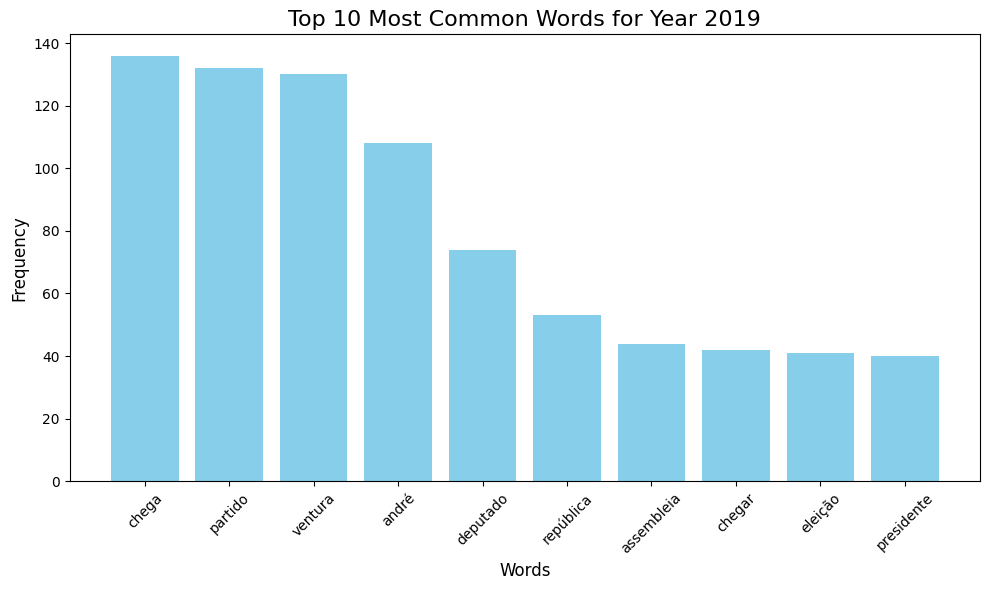

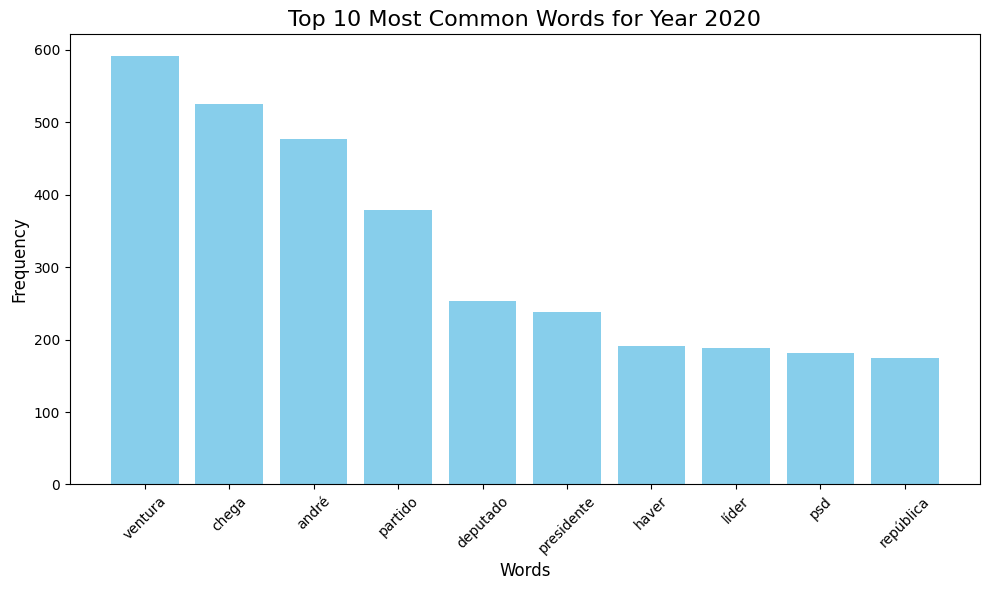

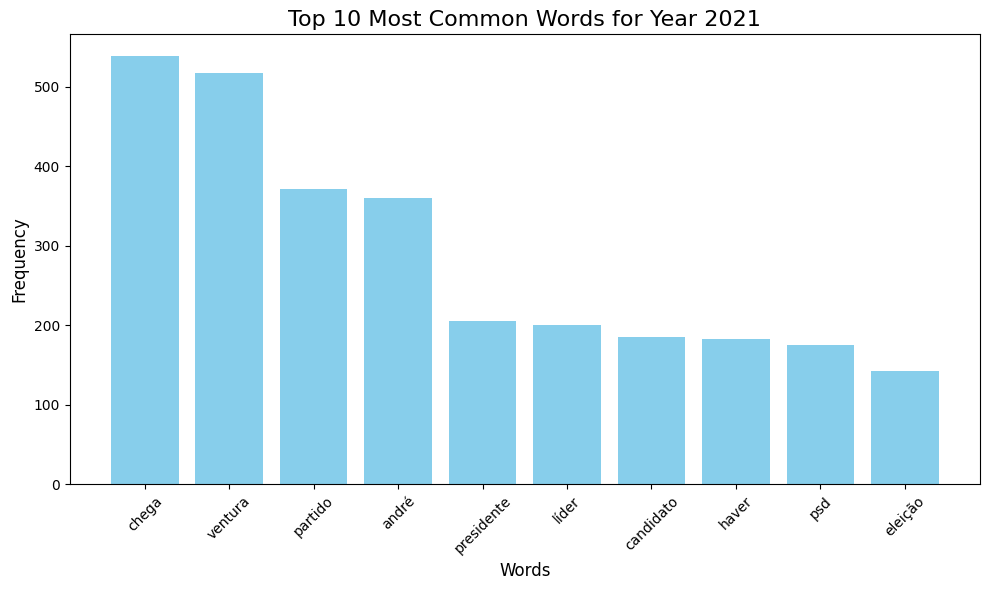

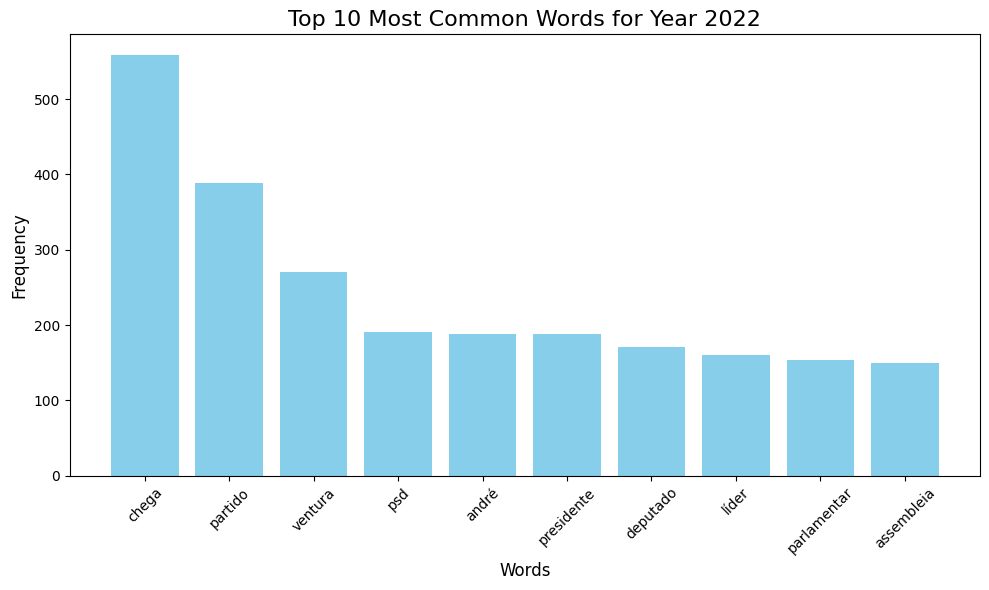

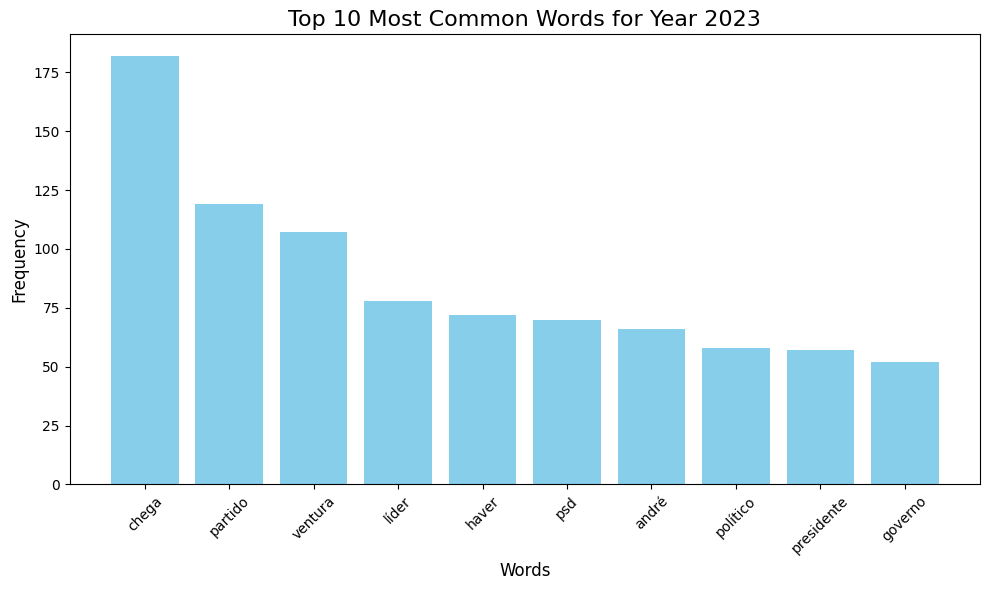

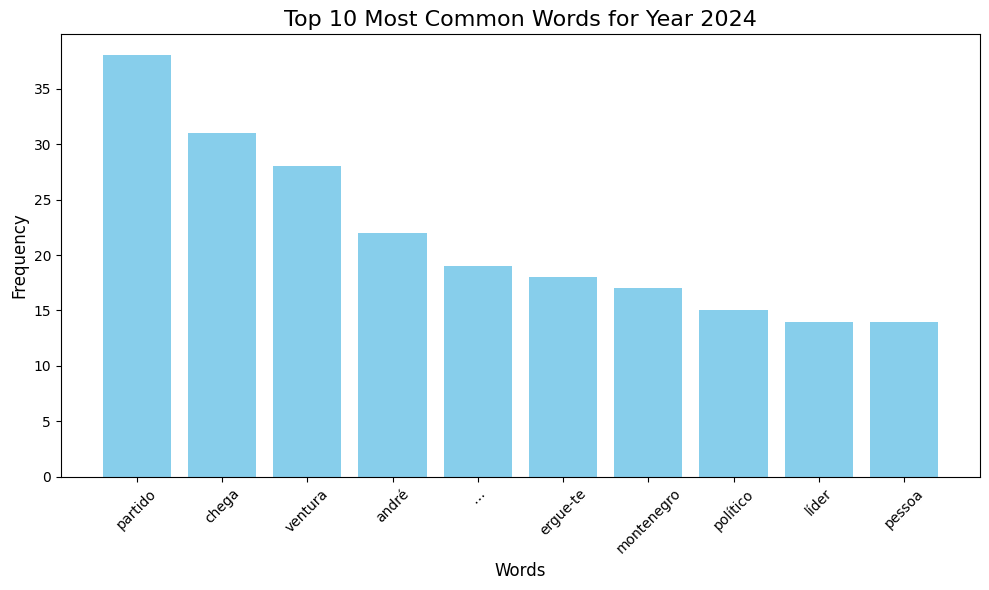

In [70]:
def plot_yearly_top_words(combined_df, text_column='Lemma_String', timestamp_column='timestamp', top_n=10):
    """
    Generate bar plots of the top n most common words for each year in the DataFrame.
    
    Parameters:
        combined_df (DataFrame): The pandas DataFrame containing the data.
        text_column (str): The column containing text data for analysis.
        timestamp_column (str): The column containing timestamps from which years are extracted.
        top_n (int): The number of top words to display for each year.
    """
    # Extract the year from the timestamp column
    combined_df['year'] = combined_df[timestamp_column].astype(str).str[:4]
    
    # Get unique years in the DataFrame
    unique_years = sorted(combined_df['year'].unique())  # Ensure years are sorted
    
    # Loop through each year and generate the top words plot
    for year in unique_years:
        # Filter rows for the current year
        year_combined_df = combined_df[combined_df['year'] == year]
        
        # Combine all text for current year in string
        combined_text = ' '.join(year_combined_df[text_column].dropna())

        # Split the combined text into words
        all_words = combined_text.split()
        
        # Count the frequency of each word
        word_counts = Counter(all_words)
        
        # Get the top n most common words
        most_common_words = word_counts.most_common(top_n)
        words, frequencies = zip(*most_common_words)  # Unpack words and frequencies
        
        # Create filename for saving
        # filename = f"/Users/hannes_seidl/Desktop/UA_Aveiro/WS24:25/FDS/FDS_project_pics/most_common_words_year_{year}" # comment in and change filepath if saving of the plot is necessary

        # Plot the top n most common words
        plt.figure(figsize=(10, 6))
        plt.bar(words, frequencies, color='skyblue')
        plt.title(f"Top {top_n} Most Common Words for Year {year}", fontsize=16)
        plt.xlabel("Words", fontsize=12)
        plt.ylabel("Frequency", fontsize=12)
        plt.xticks(rotation=45)
        plt.tight_layout()
        # plt.savefig(filename)
        plt.show()
        
plot_yearly_top_words(combined_df, text_column='Lemmas_str', timestamp_column='published_date', top_n=10)

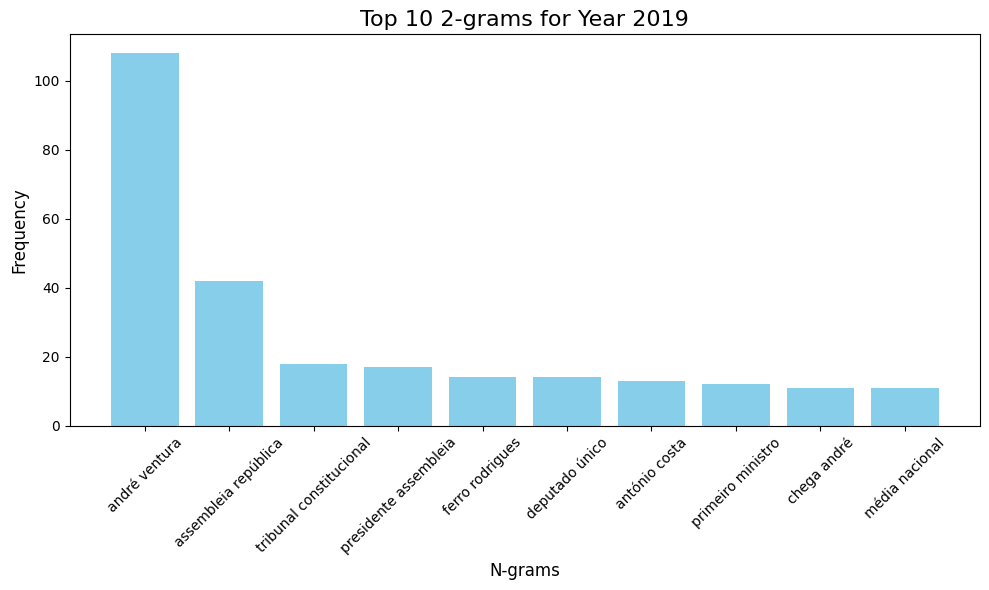

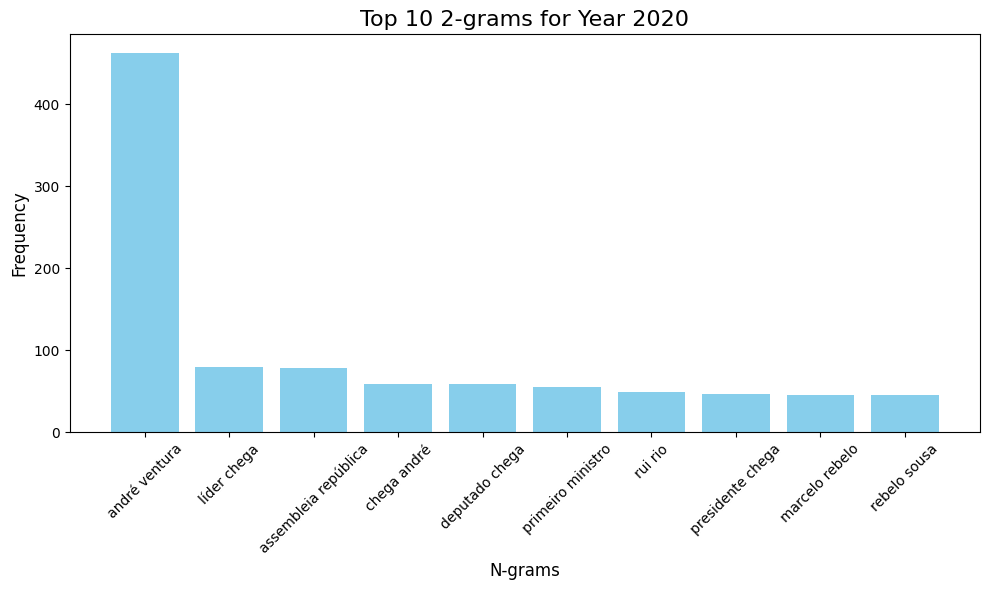

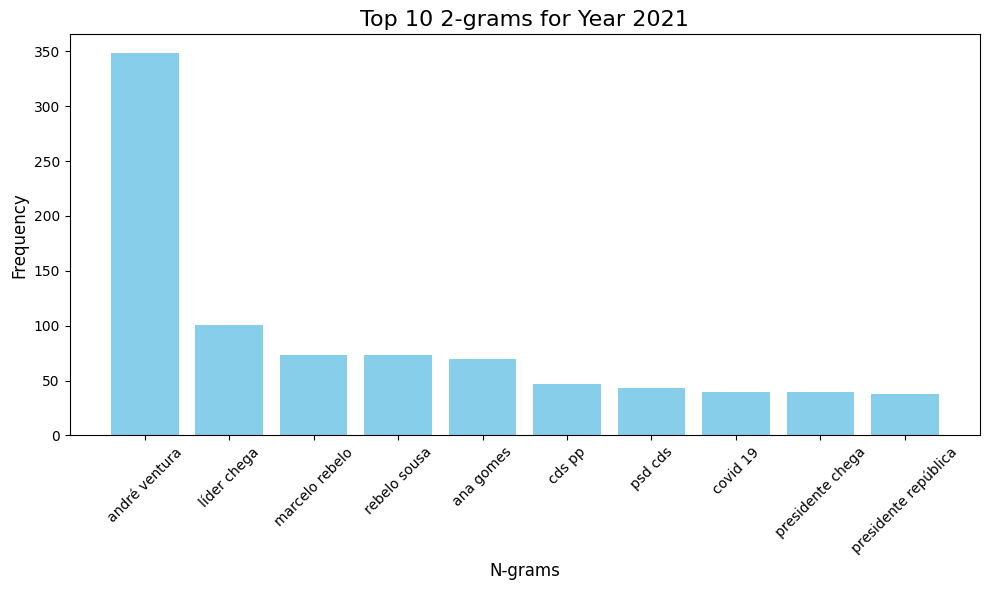

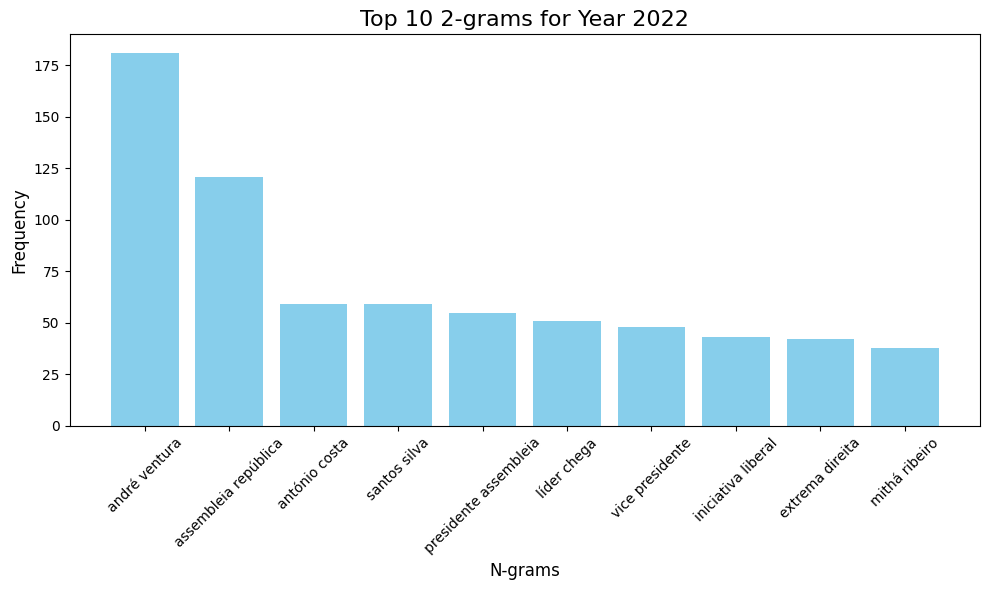

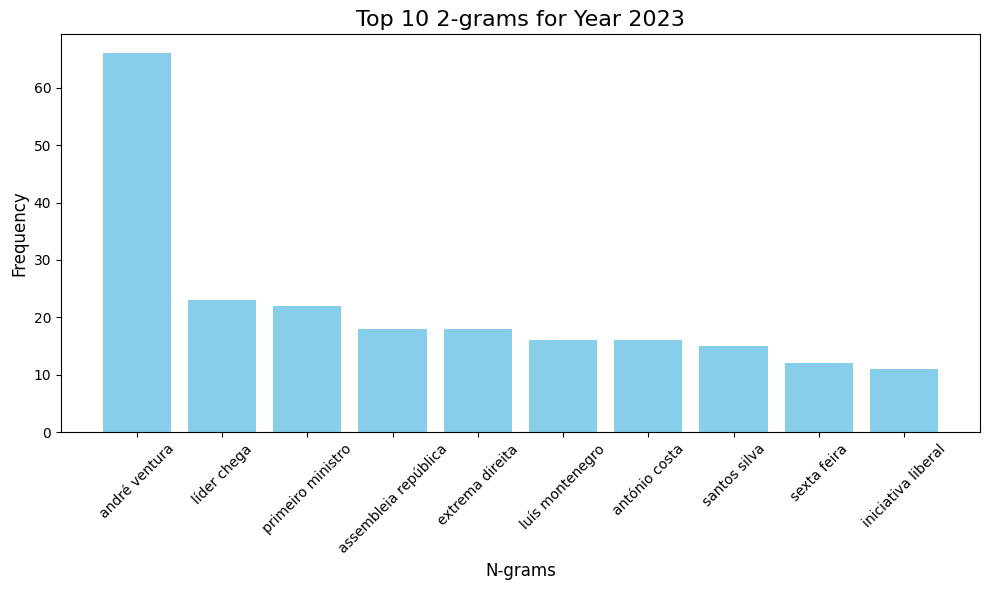

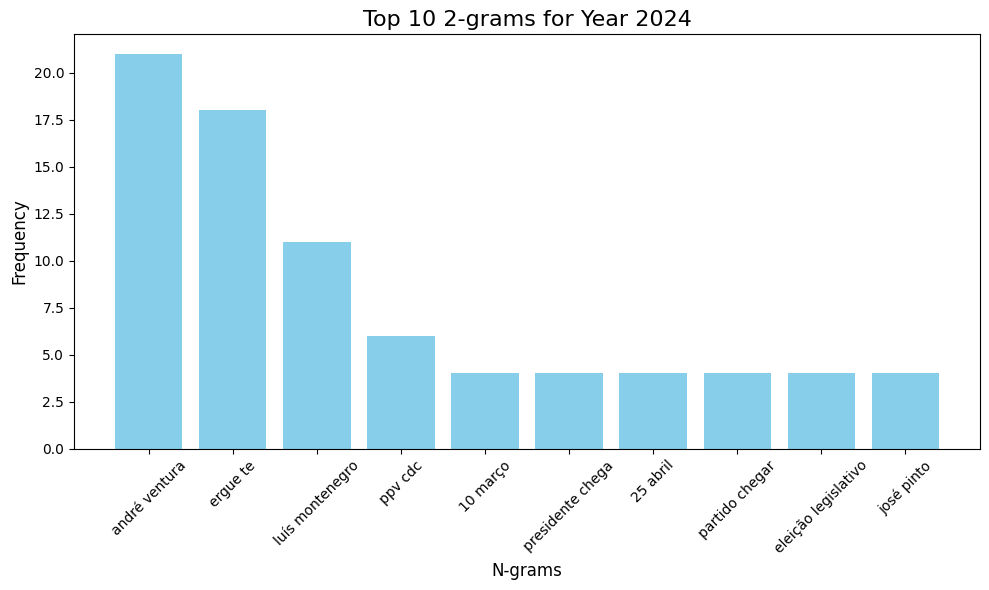

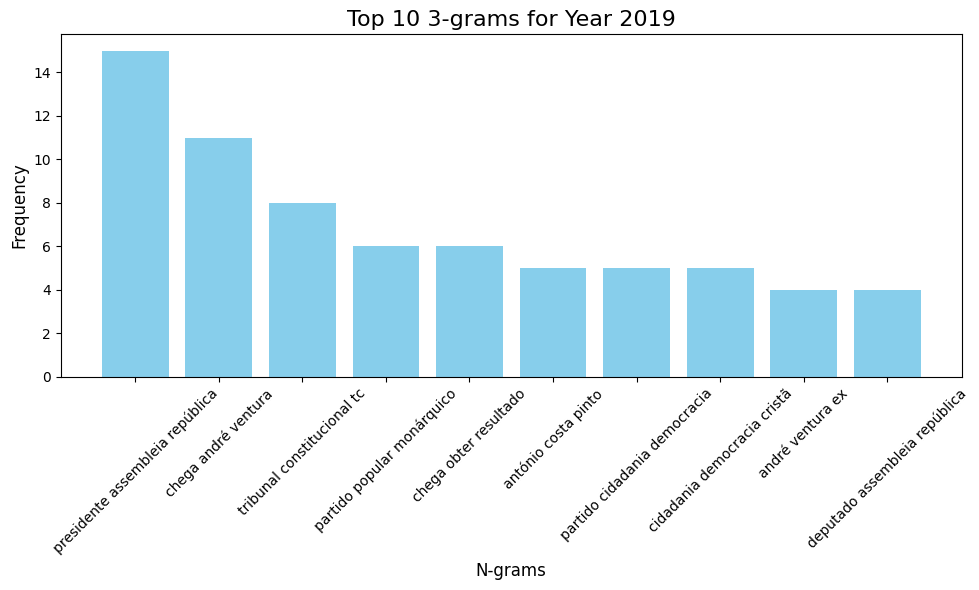

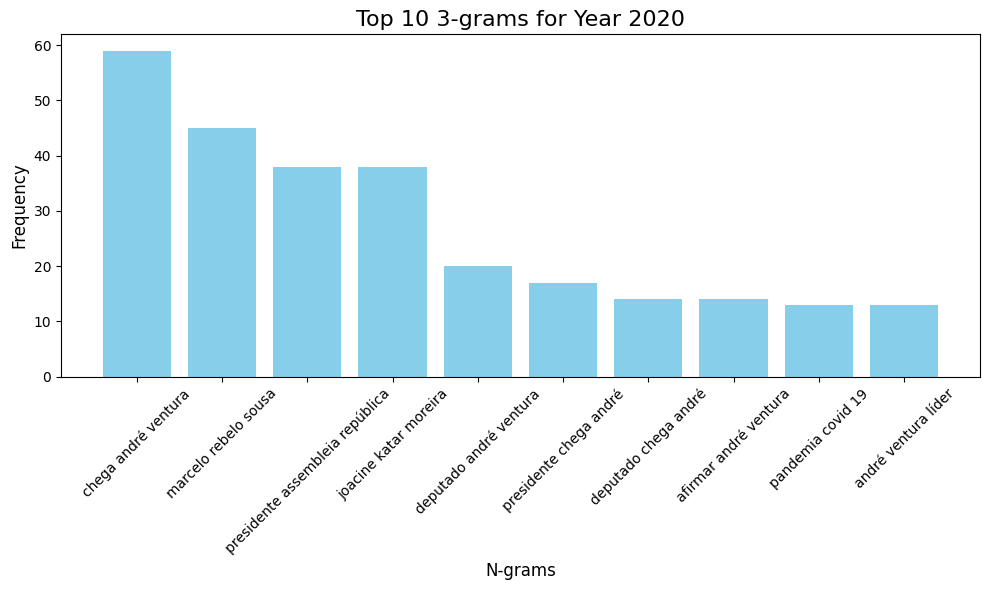

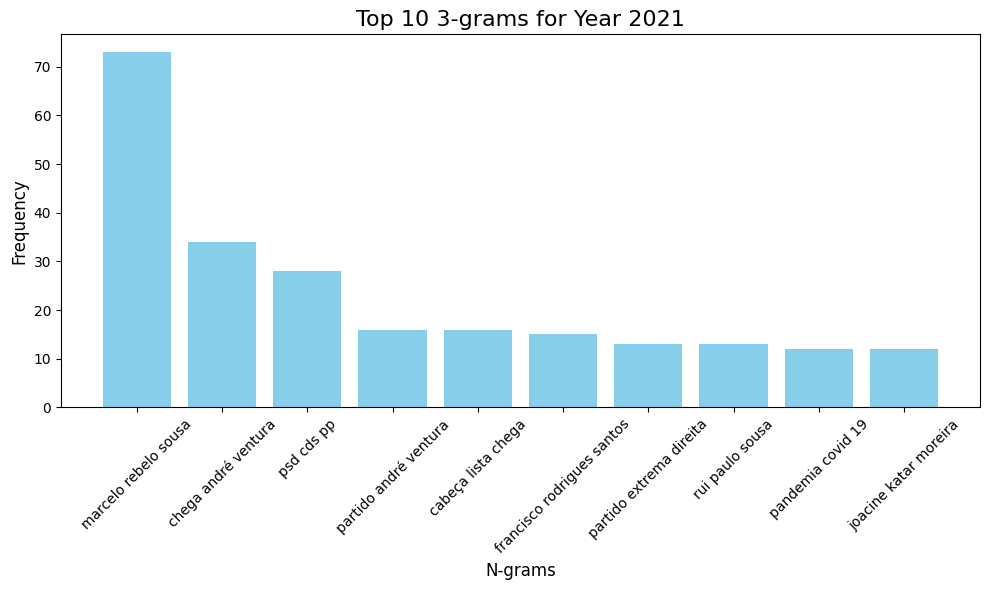

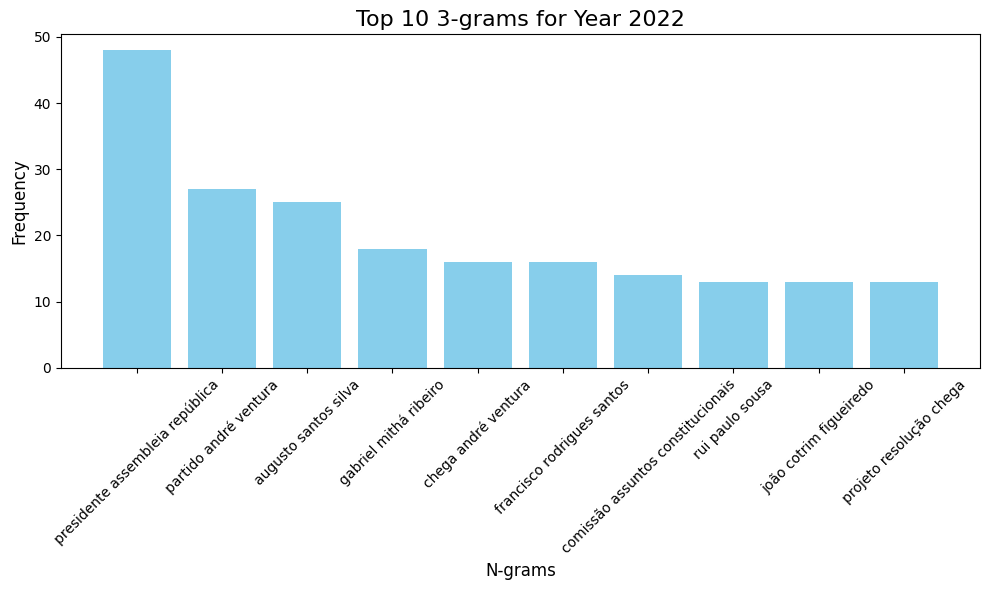

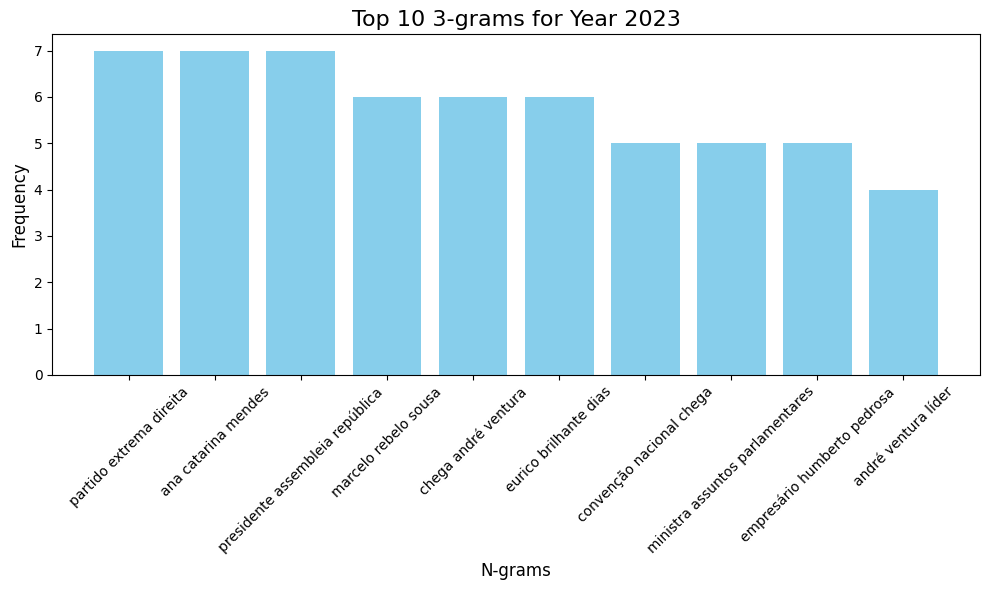

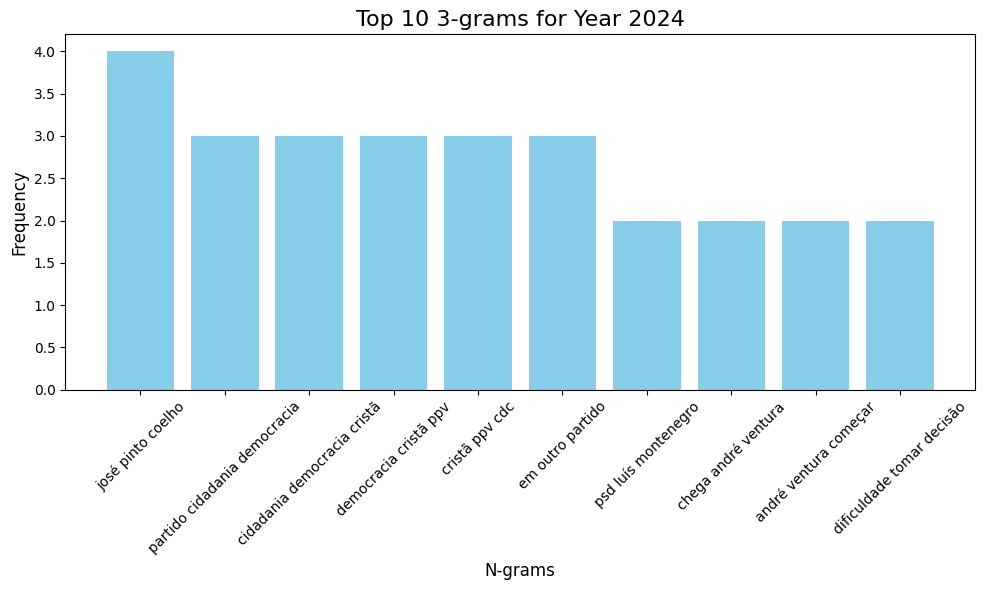

In [85]:
def plot_yearly_ngrams(combined_df, text_column='Lemma_String', timestamp_column='timestamp', ngram_range=(2, 2), top_n=10):
    """
    Generate n-grams from the text column for each year in the DataFrame
    and plot the top n most common n-grams for each year.
    
    Parameters:
        combined_df (DataFrame): The pandas DataFrame containing the data.
        text_column (str): The column containing text data for analysis.
        timestamp_column (str): The column containing timestamps from which years are extracted.
        ngram_range (tuple): The range of n-grams to generate (e.g., (2, 2) for bigrams).
        top_n (int): The number of top n-grams to display for each year.
    """
    # Extract the year from the timestamp column
    combined_df['year'] = combined_df[timestamp_column].astype(str).str[:4]
    
    # Get unique years in the DataFrame
    unique_years = sorted(combined_df['year'].unique())  # Ensure years are sorted
    
    # Loop through each year and generate the top n-grams plot
    for year in unique_years:
        # Filter rows for the current year
        year_combined_df = combined_df[combined_df['year'] == year]
        
        # Combine all text for current year in string
        combined_text = ' '.join(year_combined_df[text_column].dropna())

        # Create a CountVectorizer for the specified n-gram range
        vectorizer = CountVectorizer(ngram_range=ngram_range)
        ngrams_matrix = vectorizer.fit_transform([combined_text])  # Fit and transform the text
        
        # Count the occurrences of each n-gram
        ngrams_counts = ngrams_matrix.sum(axis=0)
        ngrams_freq = [(word, ngrams_counts[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
        ngrams_freq = sorted(ngrams_freq, key=lambda x: x[1], reverse=True)[:top_n]  # Sort and get top n

        # Create filename for saving
        # filename = f"/Users/hannes_seidl/Desktop/UA_Aveiro/WS24:25/FDS/FDS_project_pics/top_10_{ngram_range[0]}-grams_year_{year}" # c omment in and change filepath if saving of the plot is necessary

        # Separate n-grams and their frequencies
        if ngrams_freq:  # Check if there are any n-grams
            ngrams, frequencies = zip(*ngrams_freq)

            # Plot the top n most common n-grams
            plt.figure(figsize=(10, 6))
            plt.bar(ngrams, frequencies, color='skyblue')
            plt.title(f"Top {top_n} {ngram_range[0]}-grams for Year {year}", fontsize=16)
            plt.xlabel("N-grams", fontsize=12)
            plt.ylabel("Frequency", fontsize=12)
            plt.xticks(rotation=45)
            plt.tight_layout()
            # plt.savefig(filename)
            plt.show()
        else:
            print(f"No {ngram_range[0]}-grams found for year {year}.")

plot_yearly_ngrams(combined_df, text_column='Lemmas_str', timestamp_column='timestamp', ngram_range=(2, 2), top_n=10)  # Bigrams
plot_yearly_ngrams(combined_df, text_column='Lemmas_str', timestamp_column='timestamp', ngram_range=(3, 3), top_n=10)  # Trigrams

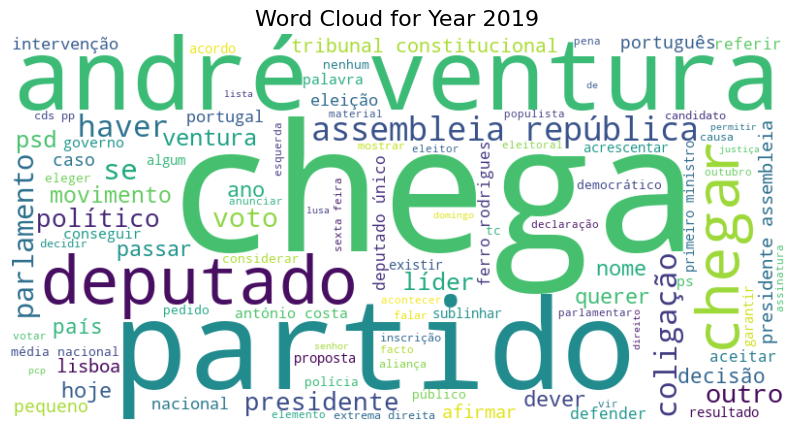

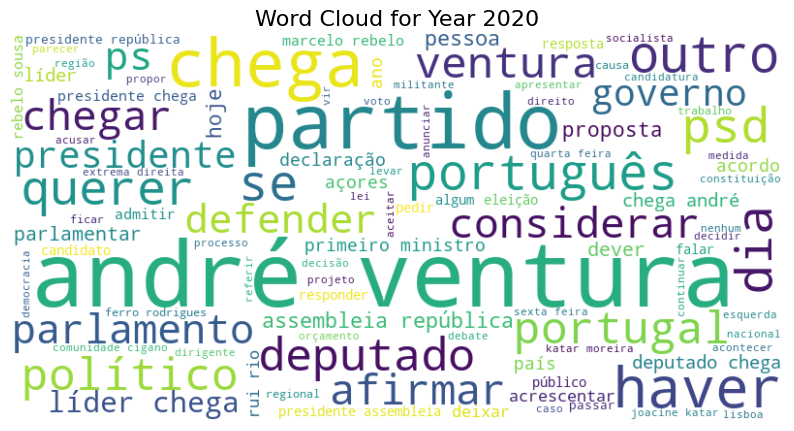

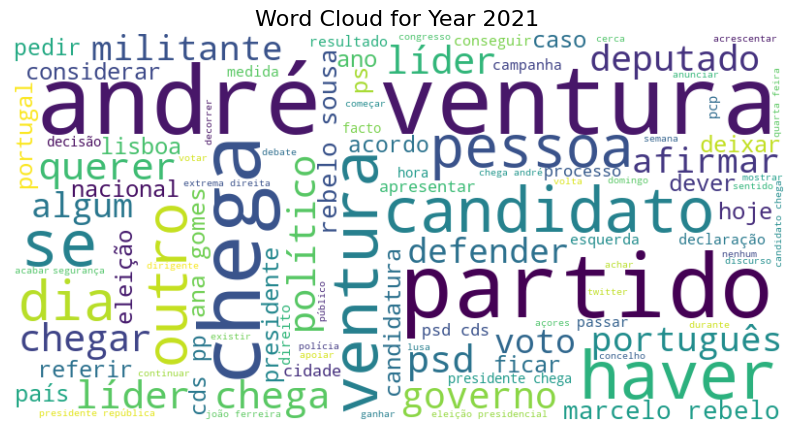

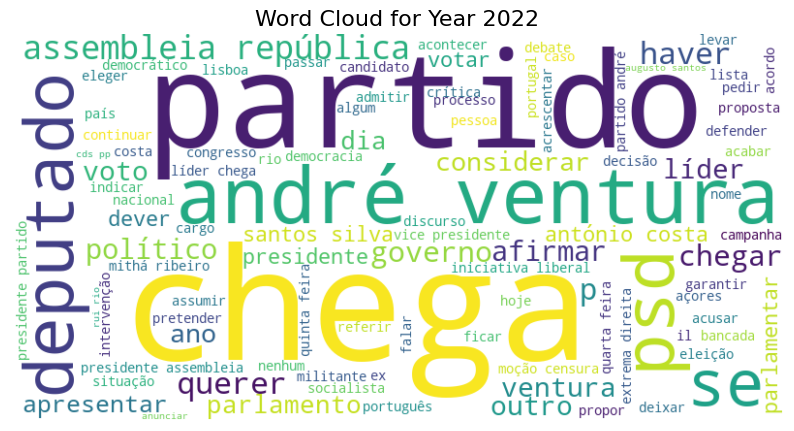

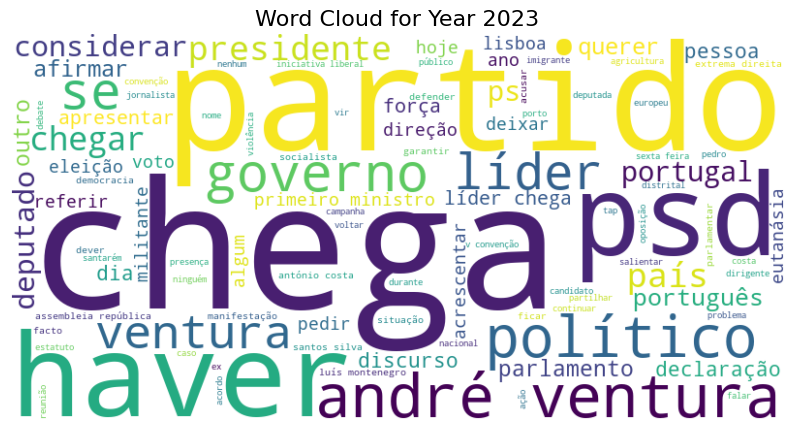

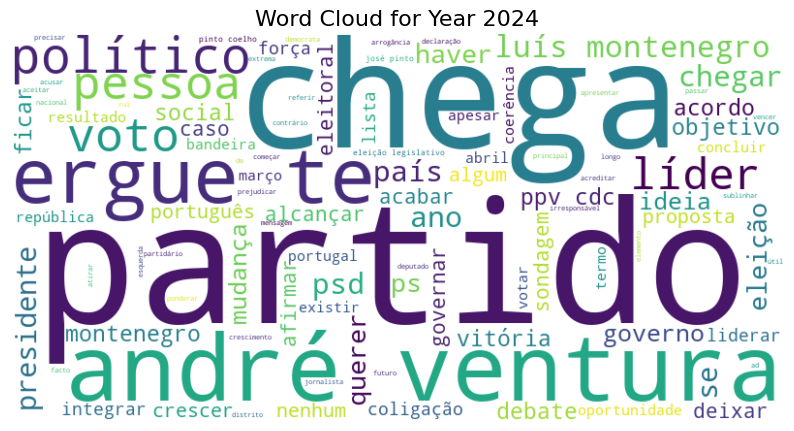

In [91]:
def generate_yearly_wordclouds(df, text_column='Lemma_String', timestamp_column='timestamp'):
    """
    Generate and display word clouds for each year present in the DataFrame.
    
    Parameters:
        df (DataFrame): The pandas DataFrame containing the data.
        text_column (str): The column containing text data for word clouds.
        timestamp_column (str): The column containing timestamps from which years are extracted.
    """
    # Extract the year from the timestamp column
    df['year'] = df[timestamp_column].astype(str).str[:4]
    
    # Sorting DataFrame by years
    df = df.sort_values('year')

    # Get unique years in the DataFrame
    unique_years = df['year'].unique()
    
    # Loop through each year and generate a word cloud
    for year in unique_years:
        # Filter rows for the current year
        year_df = df[df['year'] == year]
        
        # Combine all text for current year in string
        combined_text = ' '.join(year_df[text_column].dropna())

        # Generate the word cloud
        wordcloud = WordCloud(
            width=800,
            height=400,
            background_color='white',
            max_words=100,
            contour_width=3,
            contour_color='steelblue'
        ).generate(combined_text)
        
        # Create filename for saving
        # filename = f"/Users/hannes_seidl/Desktop/UA_Aveiro/WS24:25/FDS/FDS_project_pics/wc_year_{year}"; # comment in and change filepath if saving of the plot is necessary


        # Plot the word cloud
        plt.figure(figsize=(10, 6))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')  # Turn off axes
        plt.title(f"Word Cloud for Year {year}", fontsize=16)
        # plt.savefig(fname=filename)
        plt.show()
        
generate_yearly_wordclouds(combined_df, text_column='Lemmas_str', timestamp_column='timestamp')